In [47]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [48]:
whale_returns_csv = Path("whale_returns.csv")
whale_pd = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_pd.sort_index(inplace=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [49]:
# Cleaning out null values
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [50]:
# removing unkown data
whale_pd.dropna(inplace=True)
whale_pd

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


Algorithmic Daily Returns

In [51]:
algo_returns_csv= Path("algo_returns.csv")
algo_returns_pd = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns_pd.sort_index(inplace=True)
algo_returns_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [52]:
# Count Nulls
algo_returns_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [53]:
# Drop Nulls
algo_returns_pd.dropna(inplace=True)
algo_returns_pd

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


S&P 500 Returns

In [54]:
# Reading S&P 500 Closing Prices
sp500_history_csv= Path("sp500_history.csv")
sp500_history_pd = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_pd.sort_index(inplace=True)
sp500_history_pd.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [55]:
str(sp500_history_pd.index.dtype)

'datetime64[ns]'

In [56]:
# Check Data Types
sp500_history_pd.isnull().sum()

Close    0
dtype: int64

In [57]:
# Drop Nulls
sp500_history_pd.dropna(inplace=True)
sp500_history_pd

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"
...,...
2019-04-16,"$2,907.06"
2019-04-17,"$2,900.45"
2019-04-18,"$2,905.03"


In [58]:
# checking data types
str(whale_pd.index.dtype)

'datetime64[ns]'

In [59]:
algo_returns_pd.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [60]:
sp500_history_pd.dtypes

Close    object
dtype: object

In [61]:
sp500_history_pd['Close'] = sp500_history_pd['Close'].str.replace('$', '')
sp500_history_pd['Close']

Date
2012-10-01    1,444.49 
2012-10-02    1,445.75 
2012-10-03    1,450.99 
2012-10-04    1,461.40 
2012-10-05    1,460.93 
                ...    
2019-04-16    2,907.06 
2019-04-17    2,900.45 
2019-04-18    2,905.03 
2019-04-22    2,907.97 
2019-04-23    2,933.68 
Name: Close, Length: 1649, dtype: object

In [62]:
#Take out commas
sp500_history_pd['Close'][0].replace(',', '')

'1444.49 '

In [63]:
sp500_history_pd['Close'] = sp500_history_pd['Close'].map(lambda s: float(s.replace(',','')))

In [64]:
sp500_history_pd['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [65]:
#Calculate the Daily Difference
sp500_history_pd["dailydiff"] = sp500_history_pd['Close'].diff()
sp500_history_pd.head()

,Close,dailydiff
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,1.26
2012-10-03,1450.99,5.24
2012-10-04,1461.40,10.41
2012-10-05,1460.93,-0.47


In [66]:
# Calculate the returns
sp500_history_pd["returns"] = sp500_history_pd["dailydiff"]/sp500_history_pd["Close"]
sp500_history_pd.head()

,Close,dailydiff,returns
Date,,,
2012-10-01,1444.49,NaN,NaN
2012-10-02,1445.75,1.26,0.000872
2012-10-03,1450.99,5.24,0.003611
2012-10-04,1461.40,10.41,0.007123
2012-10-05,1460.93,-0.47,-0.000322


In [67]:
sp500_history_pd["S&P 500"] = sp500_history_pd["returns"]
sp500_history_pd.head()

,Close,dailydiff,returns,S&P 500
Date,,,,
2012-10-01,1444.49,NaN,NaN,NaN
2012-10-02,1445.75,1.26,0.000872,0.000872
2012-10-03,1450.99,5.24,0.003611,0.003611
2012-10-04,1461.40,10.41,0.007123,0.007123
2012-10-05,1460.93,-0.47,-0.000322,-0.000322


In [68]:
sp500_ret = sp500_history_pd.dropna()
sp500_ret

,Close,dailydiff,returns,S&P 500
Date,,,,
2012-10-02,1445.75,1.26,0.000872,0.000872
2012-10-03,1450.99,5.24,0.003611,0.003611
2012-10-04,1461.40,10.41,0.007123,0.007123
2012-10-05,1460.93,-0.47,-0.000322,-0.000322
2012-10-08,1455.88,-5.05,-0.003469,-0.003469
...,...,...,...,...
2019-04-16,2907.06,1.48,0.000509,0.000509
2019-04-17,2900.45,-6.61,-0.002279,-0.002279
2019-04-18,2905.03,4.58,0.001577,0.001577


In [69]:
sp500_returns = sp500_ret.drop(['Close', 'dailydiff', 'returns'], axis=1)
sp500_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003611
2012-10-04,0.007123
2012-10-05,-0.000322
2012-10-08,-0.003469
...,...
2019-04-16,0.000509
2019-04-17,-0.002279
2019-04-18,0.001577


In [70]:
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [71]:
algo_returns_pd.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [72]:
mergedf = pd.concat([whale_pd, algo_returns_pd, sp500_returns], axis='columns', join='inner').dropna()
mergedf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004559
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004408
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001195
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014378
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003929
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002279
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001577


In [73]:
# Shoing joined Dataframes by column
final = list(mergedf.columns)
final

['SOROS FUND MANAGEMENT LLC',
 'PAULSON & CO.INC. ',
 'TIGER GLOBAL MANAGEMENT LLC',
 'BERKSHIRE HATHAWAY INC',
 'Algo 1',
 'Algo 2',
 'S&P 500']

In [74]:
final[-1] = "S&P 500"
final

['SOROS FUND MANAGEMENT LLC',
 'PAULSON & CO.INC. ',
 'TIGER GLOBAL MANAGEMENT LLC',
 'BERKSHIRE HATHAWAY INC',
 'Algo 1',
 'Algo 2',
 'S&P 500']

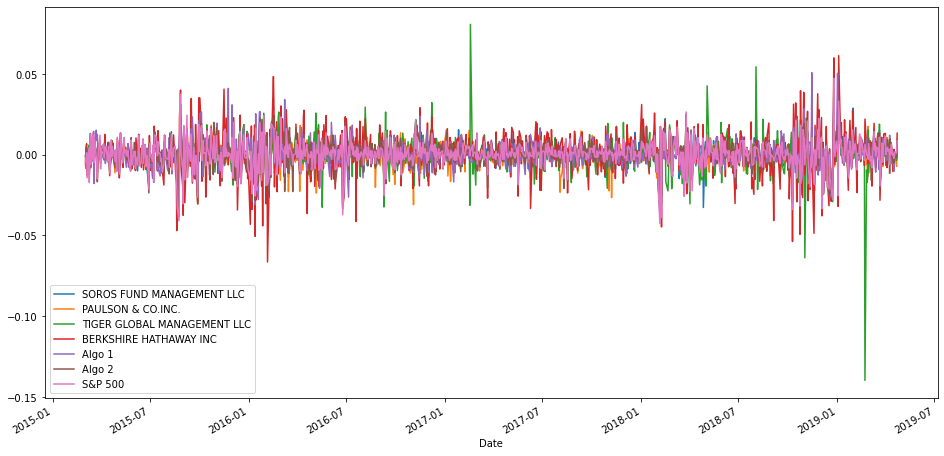

In [75]:
# Plot Daily Returns of all portfolios
mergedf.plot(figsize=(16,8))

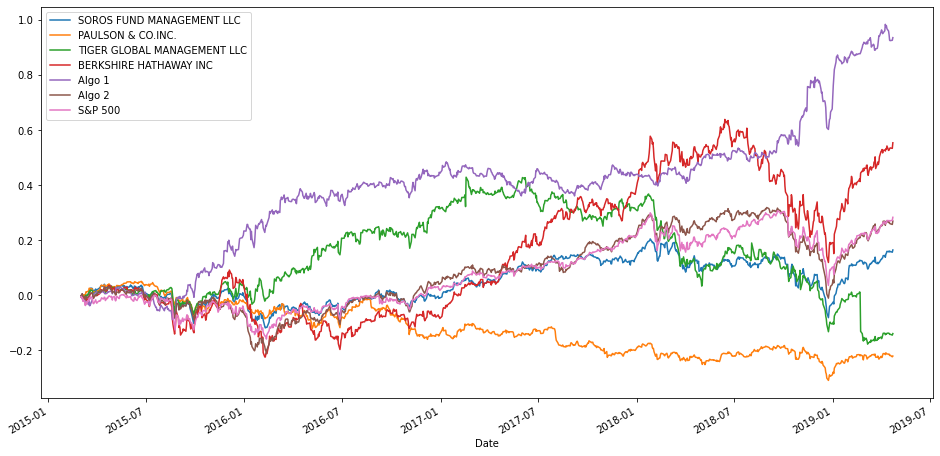

In [76]:
# Calculate and plot the Cumulative Returns
cumul_returns = (1+mergedf).cumprod() -1
cumul_returns.plot(figsize=(16,8))

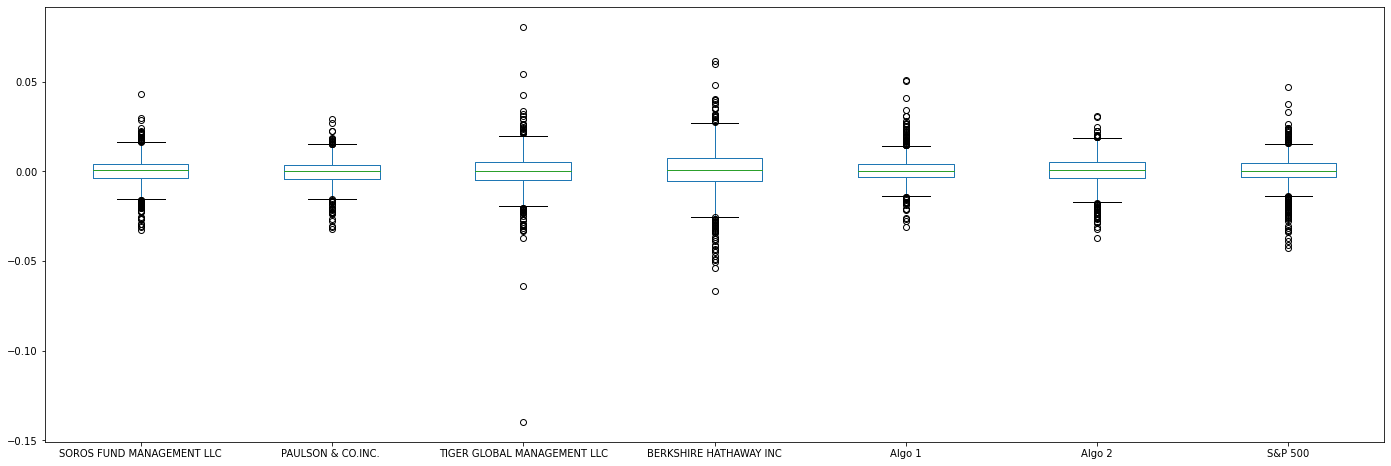

In [77]:
# Returns Box Plot
mergedf.plot.box(figsize=(24,8))

In [78]:
#Calculate the daily standard deviations
port_std = mergedf.std()
port_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008584
dtype: float64

In [79]:
# Riskier portfolios than S&P 500
riskier_port = port_std["S&P 500"]<port_std
riskier_port

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [80]:
# Annualized Standard Deviation
annualized_std = port_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.136268
dtype: float64

Rolling Statistics

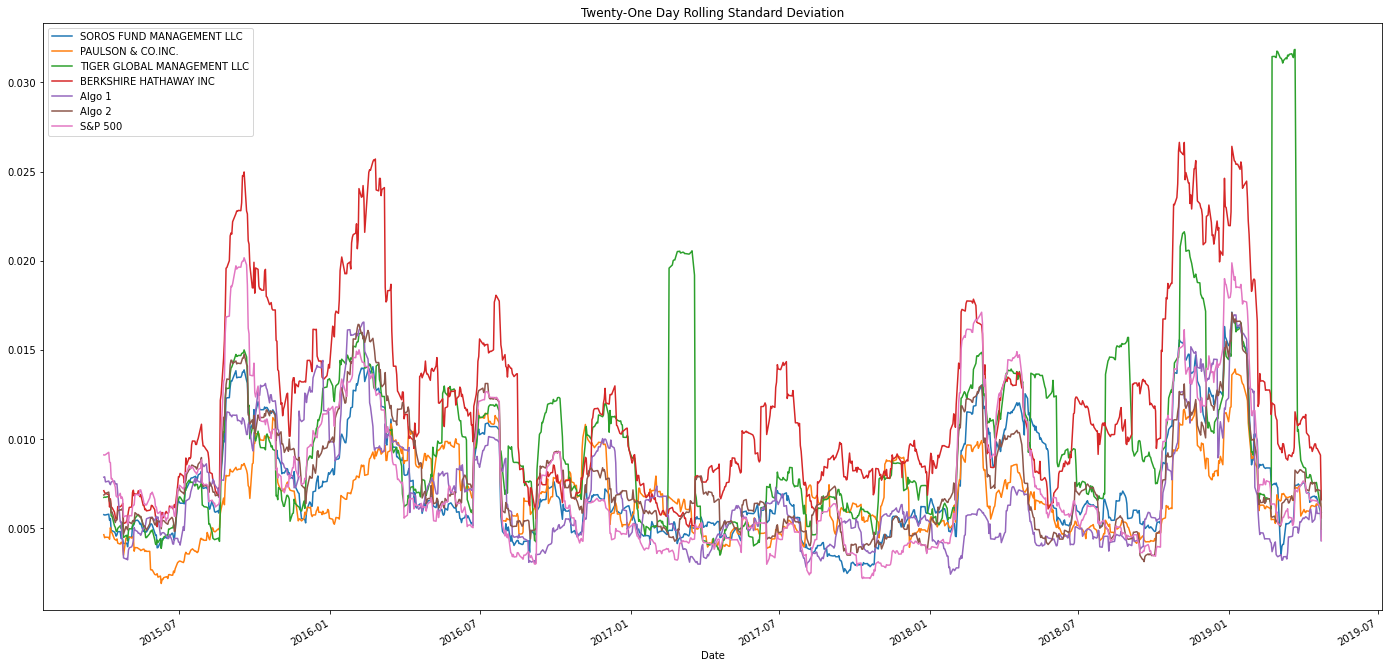

In [81]:
roll = mergedf.rolling(window=21).std()
roll.plot(figsize=(24,12), title="Twenty-One Day Rolling Standard Deviation")

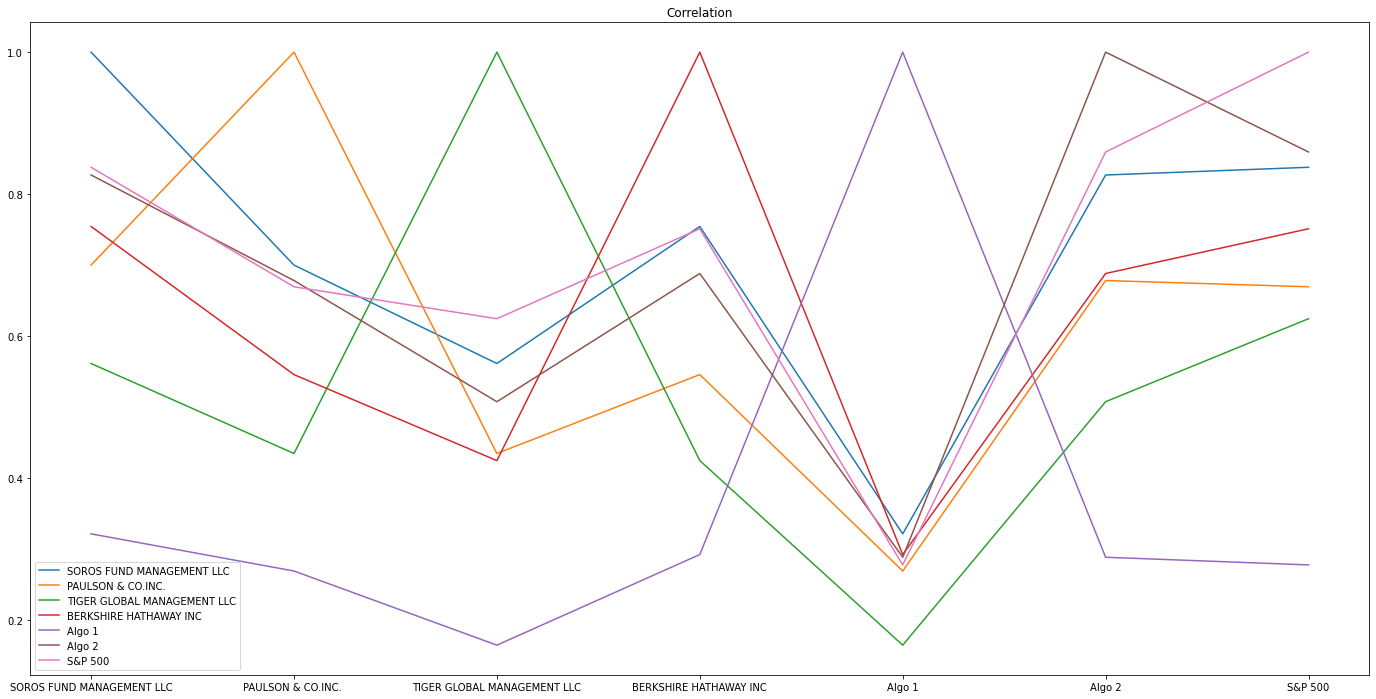

In [82]:
correlations = mergedf.corr()
correlations.plot(figsize=(24,12), title="Correlation")

In [83]:
# Covariance
covariance = mergedf["Algo 1"].rolling(window=60).cov(mergedf['S&P 500'])
covariance


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000001
2019-04-17    0.000003
2019-04-18    0.000003
2019-04-22    0.000003
2019-04-23    0.000003
Length: 1043, dtype: float64

In [84]:
# Variance
variance = mergedf['S&P 500'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64

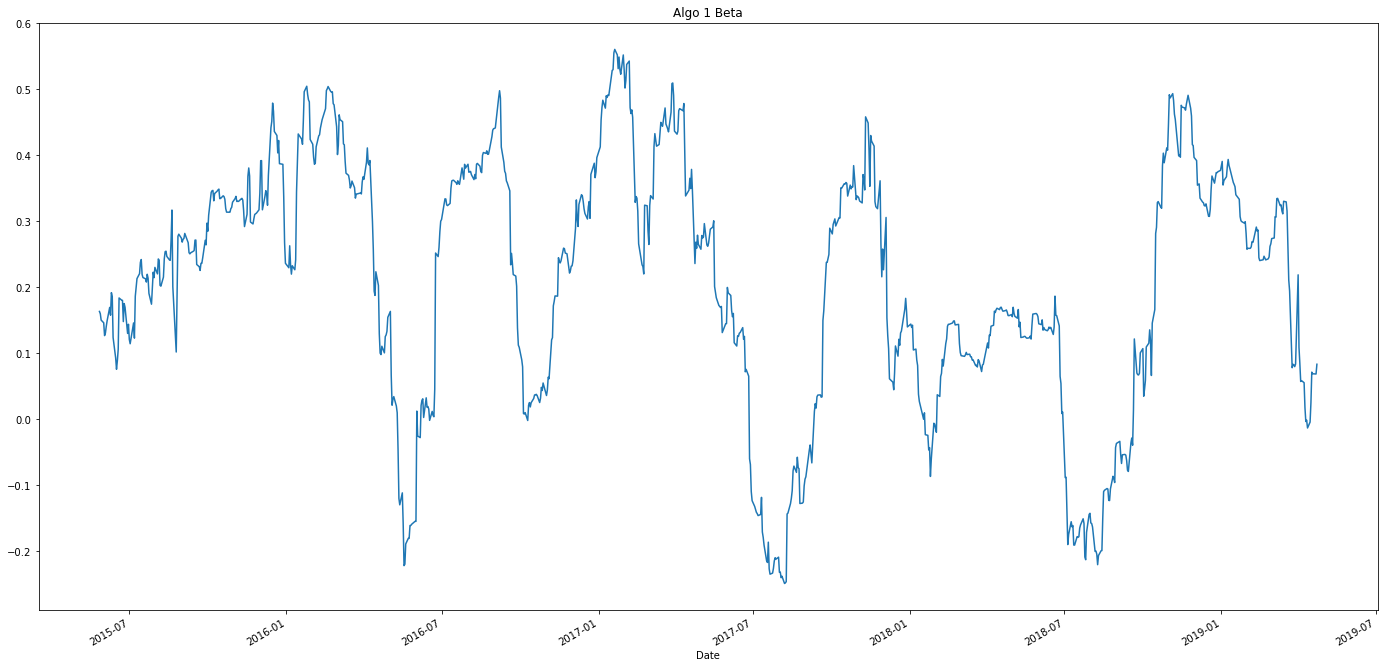

In [85]:
algo1_beta = covariance / variance
algo1_beta.plot(figsize=(24,12), title="Algo 1 Beta")

Exponentially Weighted Average

In [86]:
expo = port_std.ewm(halflife=21)
expo

EWM [com=29.799346392775035,min_periods=0,adjust=True,ignore_na=False,axis=0]

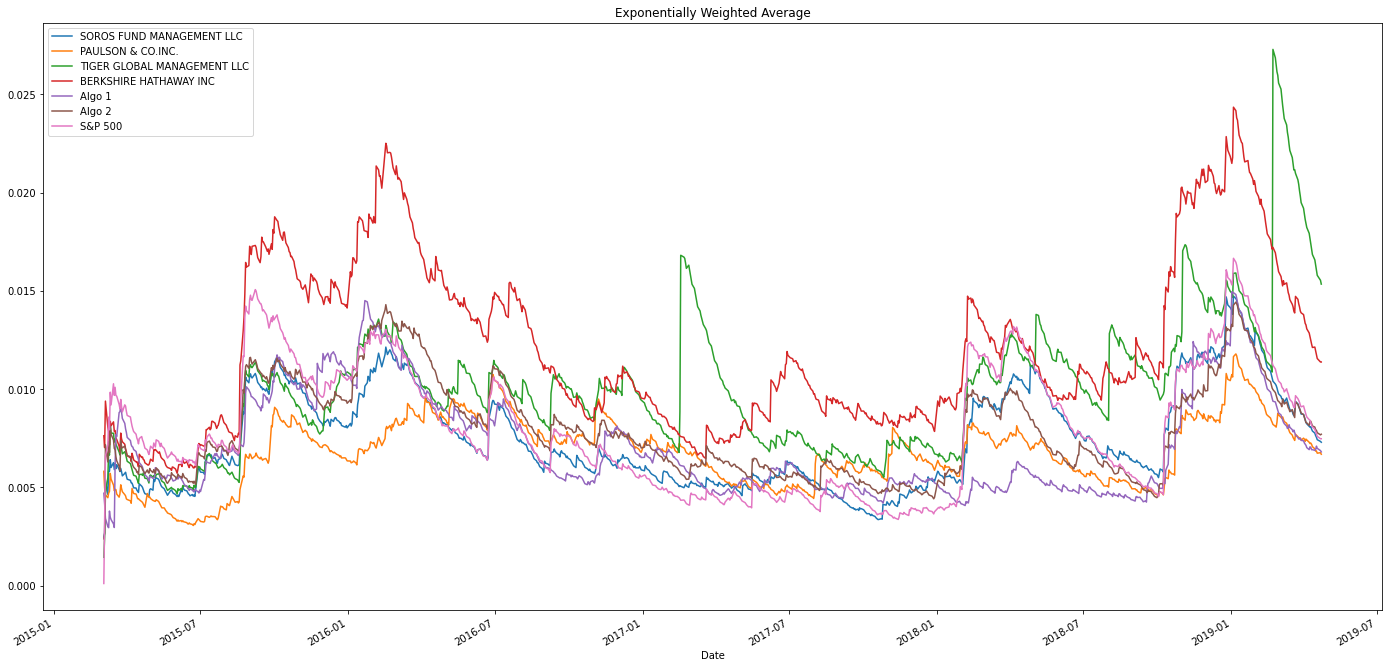

In [87]:
mergedf.ewm(halflife=21).std().plot(figsize=(24,12), title="Exponentially Weighted Average")

Sharpe Ratio

In [88]:
sharpe_ratios = (mergedf.mean() * 252) / (port_std * np.sqrt(252))
sharpe_ratios.head(7)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378649
Algo 2                         0.501364
S&P 500                        0.510171
dtype: float64

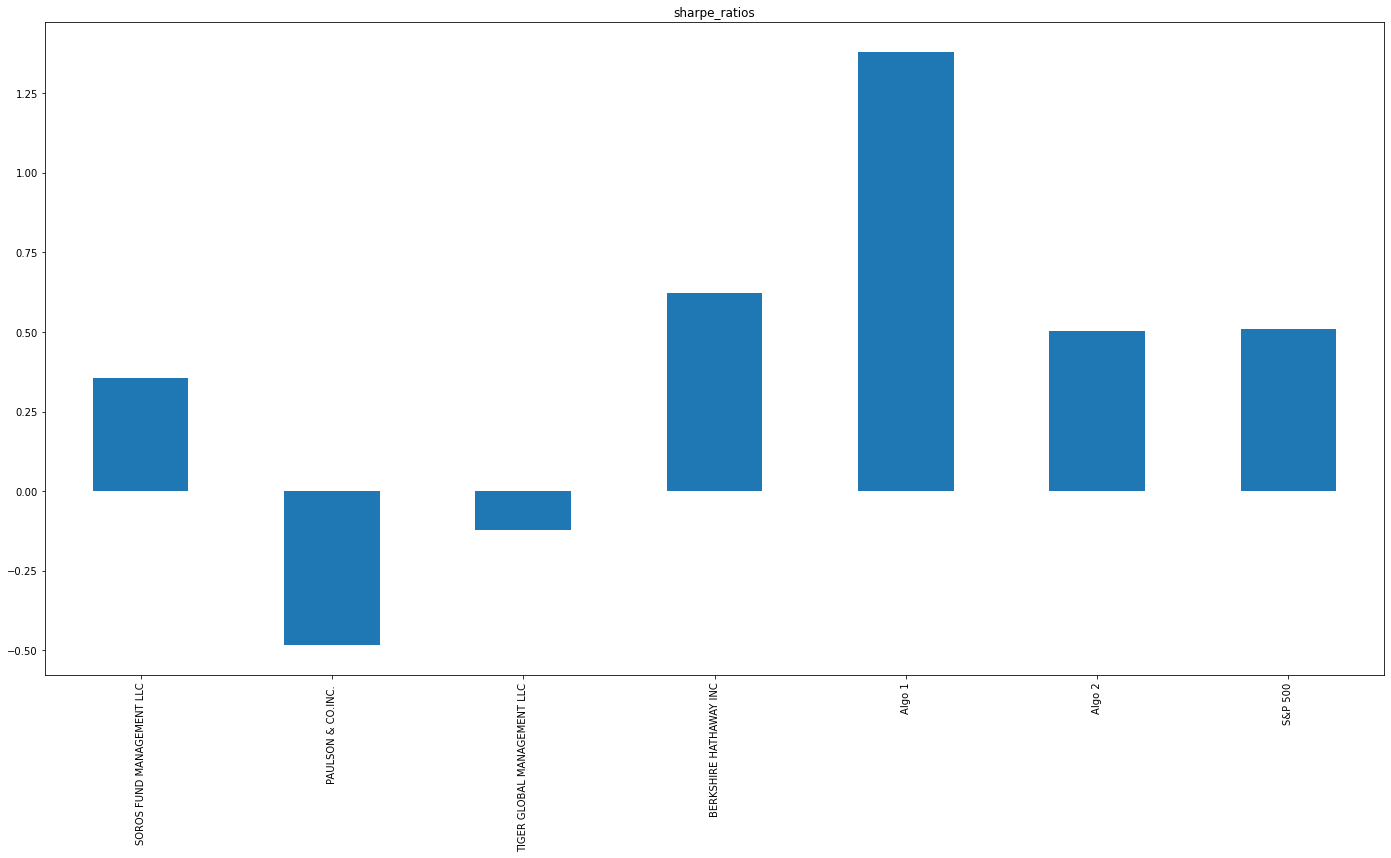

In [89]:
sharpe_ratios.plot.bar(figsize=(24,12), title="sharpe_ratios")

Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1, based off of its Sarpe Ratio, outperformed both the S&P 500 and the whales portfolio. However, Algo 2 did not outperform either: 1.378649 (Algo 1) > 0.621810 (Berkshire Hathaway Inc.) > 0.510171 (S&P 500) > 0.501364 (Algo 2).

 Create Custom Portfolio

In [90]:
# Reading data from 1st stock
AAPL = Path('3 Pandas HW/AAPL_stock_close.csv')
AAPL_df = pd.read_csv(AAPL, index_col="Date", parse_dates=True)
AAPL_df.sort_index(inplace=True)

AAPL_df

,AAPL
Date,
2015-03-03 16:00:00,32.34
2015-03-04 16:00:00,32.14
2015-03-05 16:00:00,31.60
2015-03-06 16:00:00,31.65
2015-03-09 16:00:00,31.79
...,...
2019-04-24 16:00:00,51.79
2019-04-25 16:00:00,51.32
2019-04-26 16:00:00,51.08


In [91]:
# Reading data from 2nd stock
AMZN = Path('3 Pandas HW/AMZN_stock_close.csv')
AMZN_df = pd.read_csv(AMZN, index_col="Date", parse_dates=True)
AMZN_df.sort_index(inplace=True)

AMZN_df

,AMZN
Date,
2015-03-03 16:00:00,384.61
2015-03-04 16:00:00,382.72
2015-03-05 16:00:00,387.83
2015-03-06 16:00:00,380.09
2015-03-09 16:00:00,378.56
...,...
2019-04-24 16:00:00,1901.75
2019-04-25 16:00:00,1902.25
2019-04-26 16:00:00,1950.63


In [93]:
# Reading data from 3rd stock
TSLA = Path('3 Pandas HW/TSLA_stock_close.csv')
TSLA_df = pd.read_csv(TSLA, index_col="Date", parse_dates=True)
TSLA_df.sort_index(inplace=True)

TSLA_df

,TSLA
Date,
2015-03-03 16:00:00,39.91
2015-03-04 16:00:00,40.49
2015-03-05 16:00:00,40.13
2015-03-06 16:00:00,38.78
2015-03-09 16:00:00,38.18
...,...
2019-04-24 16:00:00,51.73
2019-04-25 16:00:00,49.53
2019-04-26 16:00:00,47.03


In [94]:
# Combine all stocks in a single DataFrame
custom_port = pd.concat([AAPL_df, AMZN_df, TSLA_df], axis='columns', join='inner').dropna()
custom_port

,AAPL,AMZN,TSLA
Date,,,
2015-03-03 16:00:00,32.34,384.61,39.91
2015-03-04 16:00:00,32.14,382.72,40.49
2015-03-05 16:00:00,31.60,387.83,40.13
2015-03-06 16:00:00,31.65,380.09,38.78
2015-03-09 16:00:00,31.79,378.56,38.18
...,...,...,...
2019-04-24 16:00:00,51.79,1901.75,51.73
2019-04-25 16:00:00,51.32,1902.25,49.53
2019-04-26 16:00:00,51.08,1950.63,47.03


In [95]:
# Reset Date index
custom_port.reset_index()

,Date,AAPL,AMZN,TSLA
0,2015-03-03 16:00:00,32.34,384.61,39.91
1,2015-03-04 16:00:00,32.14,382.72,40.49
2,2015-03-05 16:00:00,31.60,387.83,40.13
3,2015-03-06 16:00:00,31.65,380.09,38.78
4,2015-03-09 16:00:00,31.79,378.56,38.18
...,...,...,...,...
1043,2019-04-24 16:00:00,51.79,1901.75,51.73
1044,2019-04-25 16:00:00,51.32,1902.25,49.53
1045,2019-04-26 16:00:00,51.08,1950.63,47.03
1046,2019-04-29 16:00:00,51.15,1938.43,48.29


In [110]:
# Calculate daily returns
# Drop NAs
# Display sample data
custom_port["AAPL Diff"] = custom_port['AAPL'].diff()
custom_port["AAPL Returns"] = custom_port['AAPL Diff']/custom_port['AMZN']

custom_port["AMZN Diff"] = custom_port['AMZN'].diff()
custom_port["AMZN Returns"] = custom_port['AMZN Diff']/custom_port['AMZN']

custom_port["TSLA Diff"] = custom_port['TSLA'].diff()
custom_port["TSLA Returns"] = custom_port['TSLA Diff']/custom_port['TSLA']


custom_returns = custom_port.drop(['AAPL', 'TSLA', 'AMZN', 'AAPL Diff', 'TSLA Diff', 'AMZN Diff'], axis=1)
custom_returns

,AAPL Returns,AMZN Returns,TSLA Returns
Date,,,
2015-03-03 16:00:00,NaN,NaN,NaN
2015-03-04 16:00:00,-0.000523,-0.004938,0.014325
2015-03-05 16:00:00,-0.001392,0.013176,-0.008971
2015-03-06 16:00:00,0.000132,-0.020364,-0.034812
2015-03-09 16:00:00,0.000370,-0.004042,-0.015715
...,...,...,...
2019-04-24 16:00:00,-0.000042,-0.011579,-0.020298
2019-04-25 16:00:00,-0.000247,0.000263,-0.044418
2019-04-26 16:00:00,-0.000123,0.024802,-0.053158


In [111]:
custom_returns.dropna(inplace=True)
custom_returns

,AAPL Returns,AMZN Returns,TSLA Returns
Date,,,
2015-03-04 16:00:00,-0.000523,-0.004938,0.014325
2015-03-05 16:00:00,-0.001392,0.013176,-0.008971
2015-03-06 16:00:00,0.000132,-0.020364,-0.034812
2015-03-09 16:00:00,0.000370,-0.004042,-0.015715
2015-03-10 16:00:00,-0.001786,-0.024492,-0.003153
...,...,...,...
2019-04-24 16:00:00,-0.000042,-0.011579,-0.020298
2019-04-25 16:00:00,-0.000247,0.000263,-0.044418
2019-04-26 16:00:00,-0.000123,0.024802,-0.053158


In [112]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_port = custom_returns.dot(weights)
# Display sample data
weighted_port.sum()

0.40222293782799035

In [120]:
total_returns = pd.concat([weighted_port, custom_returns, mergedf], axis="columns", join="outer")
total_returns.rename(columns={0: 'Weighted Returns'}, inplace=True)
total_returns

,Weighted Returns,AAPL Returns,AMZN Returns,TSLA Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,,
2015-03-03 00:00:00,NaN,NaN,NaN,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004559
2015-03-04 00:00:00,NaN,NaN,NaN,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004408
2015-03-04 16:00:00,0.002955,-0.000523,-0.004938,0.014325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05 00:00:00,NaN,NaN,NaN,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001195
2015-03-05 16:00:00,0.000938,-0.001392,0.013176,-0.008971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-24 16:00:00,-0.010640,-0.000042,-0.011579,-0.020298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-25 16:00:00,-0.014801,-0.000247,0.000263,-0.044418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-26 16:00:00,-0.009493,-0.000123,0.024802,-0.053158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
total_returns.dropna()

,Weighted Returns,AAPL Returns,AMZN Returns,TSLA Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,,


In [123]:
# Annualized Standard Deviation
annualized_std_total = total_returns * np.sqrt(252)
annualized_std_total.sum()

Weighted Returns                6.385091
AAPL Returns                    0.134611
AMZN Returns                   22.672533
TSLA Returns                   -3.651871
SOROS FUND MANAGEMENT LLC       2.935048
PAULSON & CO.INC.              -3.542182
TIGER GLOBAL MANAGEMENT LLC    -1.375528
BERKSHIRE HATHAWAY INC          8.378344
Algo 1                         10.957321
Algo 2                          4.362362
S&P 500                         4.567658
dtype: float64

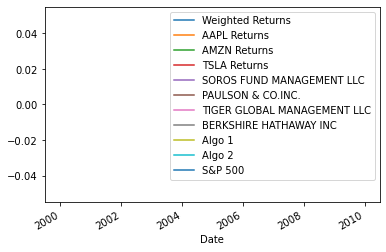

In [128]:
total_returns.rolling(window=21).std().plot()

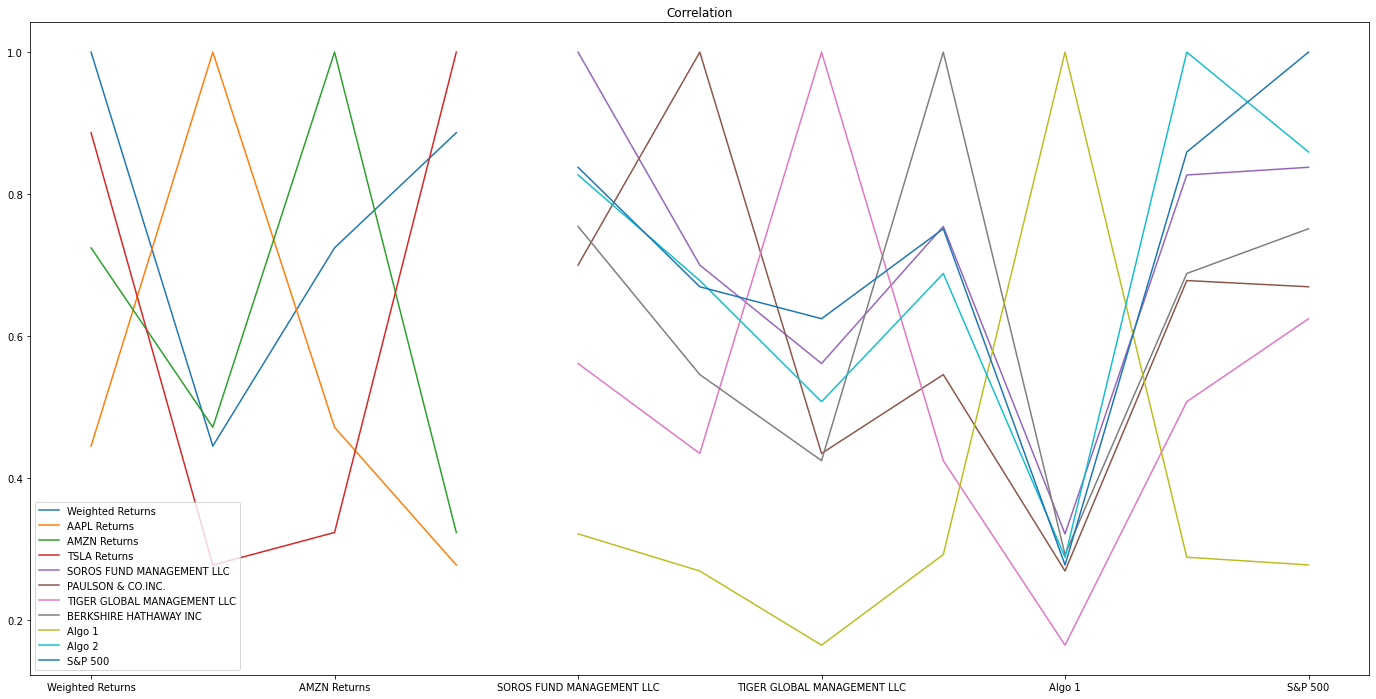

In [130]:
correlations = total_returns.corr()
correlations.plot(figsize=(24,12), title="Correlation")

In [143]:
# Covariance
covariance1 = total_returns.rolling(window=60).cov(total_returns['S&P 500'])
covariance1


,Weighted Returns,AAPL Returns,AMZN Returns,TSLA Returns,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,,,,
2015-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-24 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-25 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-26 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# Variance
Variance1 = total_returns['S&P 500'].rolling(window=60).var()
Variance1

Date
2015-03-03 00:00:00   NaN
2015-03-04 00:00:00   NaN
2015-03-04 16:00:00   NaN
2015-03-05 00:00:00   NaN
2015-03-05 16:00:00   NaN
                       ..
2019-04-24 16:00:00   NaN
2019-04-25 16:00:00   NaN
2019-04-26 16:00:00   NaN
2019-04-29 16:00:00   NaN
2019-04-30 16:00:00   NaN
Name: S&P 500, Length: 2090, dtype: float64

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

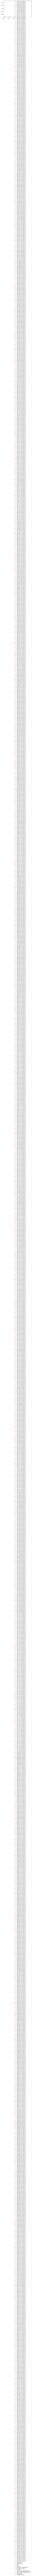

In [148]:
beta = covariance1 / Variance1
beta.plot().bar()

In [149]:
custom_std = total_returns.std()
custom_std

Weighted Returns               0.012855
AAPL Returns                   0.000634
AMZN Returns                   0.018582
TSLA Returns                   0.028006
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008584
dtype: float64

In [152]:
sharpe_ratios1 = (total_returns.mean() * 252) / (custom_std * np.sqrt(252))
sharpe_ratios1.head(7)

Weighted Returns               0.474398
AAPL Returns                   0.202920
AMZN Returns                   1.165378
TSLA Returns                  -0.124544
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

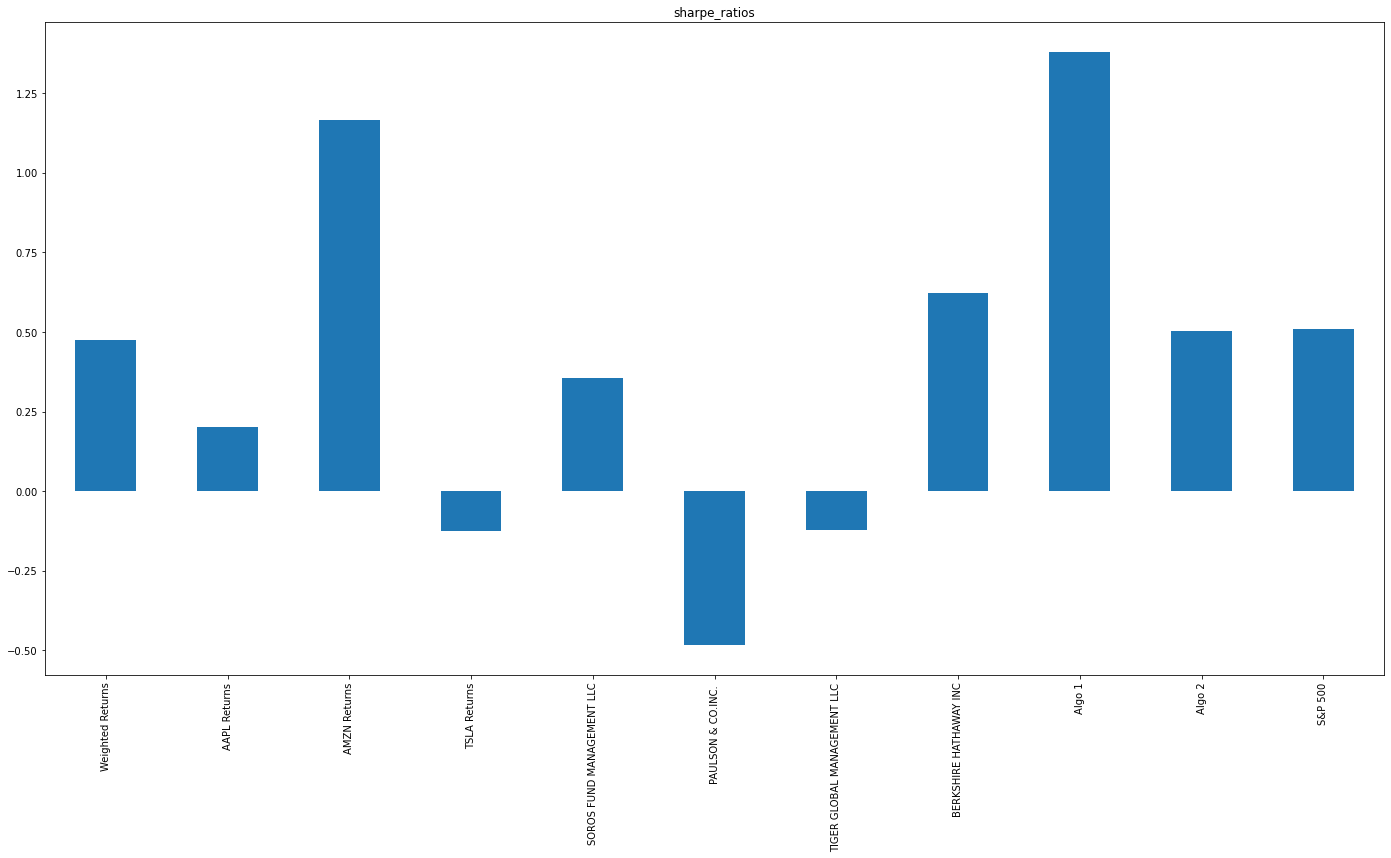

In [153]:
sharpe_ratios1.plot.bar(figsize=(24,12), title="sharpe_ratios")

My portfolio combineed does not do as well as the S&P 500, but AMZN does better than the S&P 500.